In [1]:
import numpy as np
import sklearn.datasets
import umap
import umap.plot

/Users/dominik/venv/bertopic/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/dominik/venv/bertopic/lib/python3.9/site-packages/umap/plot.py:203: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)


In [10]:
from scipy.io import loadmat

mnist = loadmat("../data/mnist-original.mat")
data = mnist["data"].T
labels = mnist["label"][0]

<h2> UMAP is not reproducible with default settings <h2>

In [11]:
mapper1 = umap.UMAP().fit(data)

<Axes: >

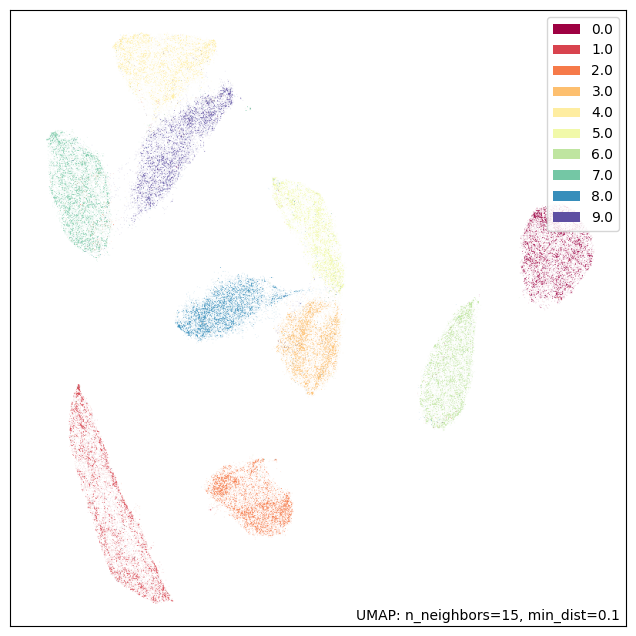

In [12]:
umap.plot.points(mapper1, labels=labels)

<Axes: >

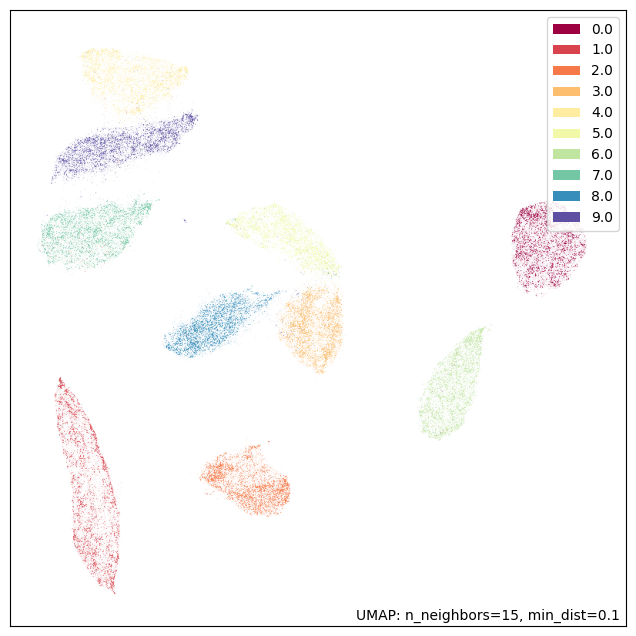

In [13]:
mapper2 = umap.UMAP().fit(data)
umap.plot.points(mapper2, labels=labels)

In [14]:
np.all(mapper1.embedding_ == mapper2.embedding_)

False

<h2> Making UMAP reproducible <h2>

/Users/dominik/venv/bertopic/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


<Axes: >

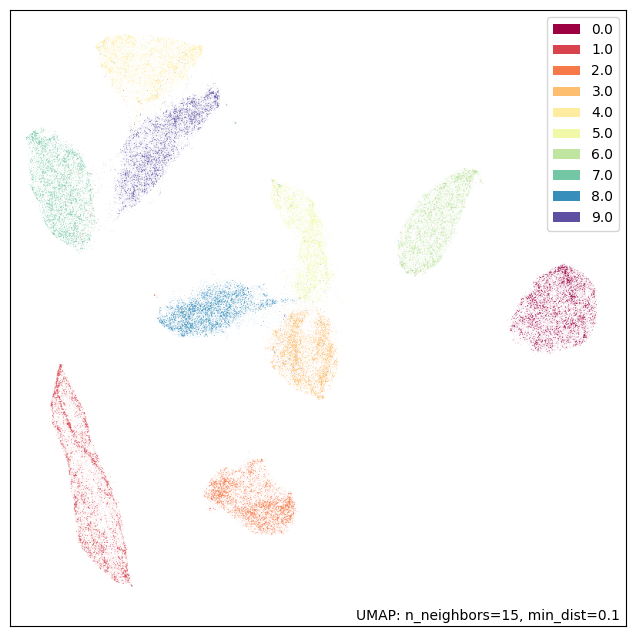

In [15]:
mapper3 = umap.UMAP(random_state=42).fit(data)
umap.plot.points(mapper3, labels=labels)

/Users/dominik/venv/bertopic/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


<Axes: >

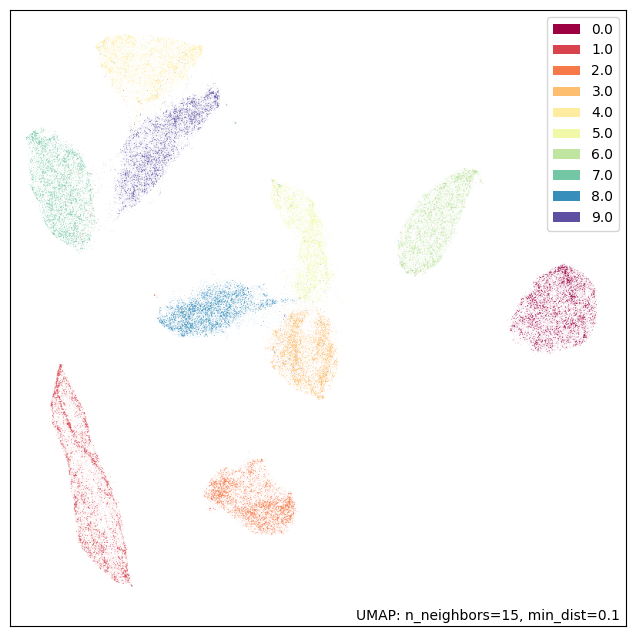

In [16]:
mapper4 = umap.UMAP(random_state=42).fit(data)
umap.plot.points(mapper4, labels=labels)

In [17]:
np.all(mapper3.embedding_ == mapper4.embedding_)

True